### Case Study: Predictive Analytics using Real-time Sensor Data (EDA)

### Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'appliance_data.csv')

In [3]:
data.head()

,Voltage (V),Ampere (A),Timestamp,Device ID
0,4.5,0.36,2024-03-01 00:00:00,TV
1,4.5,0.05,2024-03-01 00:05:00,TV
2,4.5,0.05,2024-03-01 00:10:00,TV
3,4.5,0.49,2024-03-01 00:15:00,TV
4,4.5,0.47,2024-03-01 00:20:00,TV


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Voltage (V)  10080 non-null  float64
 1   Ampere (A)   10080 non-null  float64
 2   Timestamp    10080 non-null  object 
 3   Device ID    10080 non-null  object 
dtypes: float64(2), object(2)
memory usage: 315.1+ KB


In [12]:
# Transform data to time series data
# Convert "Timestamp" column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y-%m-%d %H:%M:%S')

# Set "Timestamp" column as the index
data.set_index('Timestamp', inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10080 entries, 2024-03-01 00:00:00 to 2024-03-07 23:55:00
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Voltage (V)  10080 non-null  float64
 1   Ampere (A)   10080 non-null  float64
 2   Device ID    10080 non-null  object 
dtypes: float64(2), object(1)
memory usage: 315.0+ KB


In [14]:
data

,Voltage (V),Ampere (A),Device ID
Timestamp,,,
2024-03-01 00:00:00,4.5,0.36,TV
2024-03-01 00:05:00,4.5,0.05,TV
2024-03-01 00:10:00,4.5,0.05,TV
2024-03-01 00:15:00,4.5,0.49,TV
2024-03-01 00:20:00,4.5,0.47,TV
...,...,...,...
2024-03-07 23:35:00,5.0,0.91,Refrigerator
2024-03-07 23:40:00,5.0,0.57,Refrigerator
2024-03-07 23:45:00,5.0,0.85,Refrigerator


In [15]:
# Mengalikan kolom "Voltage (V)" dengan "Ampere (A)" untuk mendapatkan data Watt (W)
data['Watt (W)'] = data['Voltage (V)'] * data['Ampere (A)']

# Menampilkan DataFrame dengan kolom baru "Watt (W)"
print(data)


                     Voltage (V)  Ampere (A)     Device ID  Watt (W)
Timestamp                                                           
2024-03-01 00:00:00          4.5        0.36            TV     1.620
2024-03-01 00:05:00          4.5        0.05            TV     0.225
2024-03-01 00:10:00          4.5        0.05            TV     0.225
2024-03-01 00:15:00          4.5        0.49            TV     2.205
2024-03-01 00:20:00          4.5        0.47            TV     2.115
...                          ...         ...           ...       ...
2024-03-07 23:35:00          5.0        0.91  Refrigerator     4.550
2024-03-07 23:40:00          5.0        0.57  Refrigerator     2.850
2024-03-07 23:45:00          5.0        0.85  Refrigerator     4.250
2024-03-07 23:50:00          5.0        0.37  Refrigerator     1.850
2024-03-07 23:55:00          5.0        0.08  Refrigerator     0.400

[10080 rows x 4 columns]


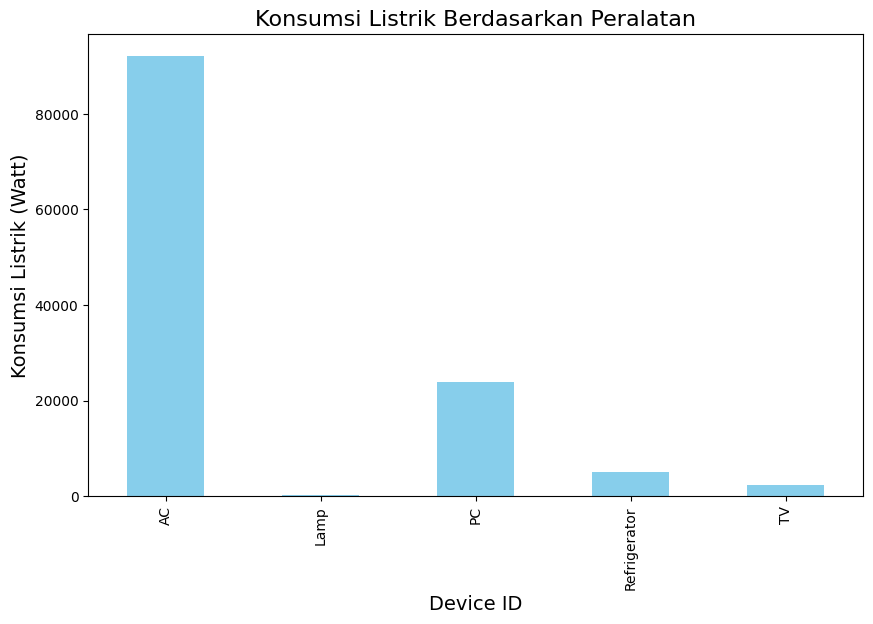

In [21]:
import matplotlib.pyplot as plt

# Mengelompokkan data berdasarkan "Device ID" dan menjumlahkan konsumsi listrik (Watt) untuk setiap perangkat
device_consumption = data.groupby('Device ID')['Watt (W)'].sum()

# Membuat grafik batang berdasarkan "Device ID"
device_consumption.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Menambahkan judul dan label sumbu
plt.title('Konsumsi Listrik Berdasarkan Peralatan', fontsize=16)
plt.xlabel('Device ID', fontsize=14)
plt.ylabel('Konsumsi Listrik (Watt)', fontsize=14)

# Menampilkan grafik
plt.show()

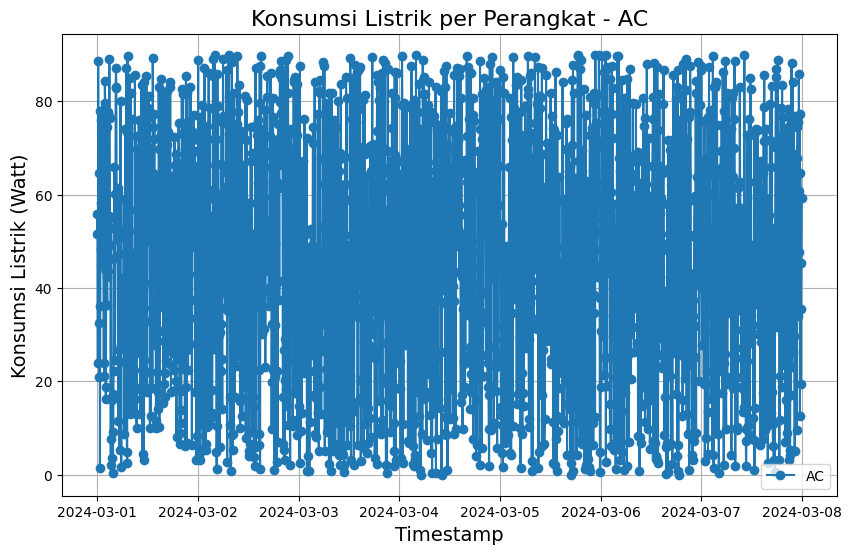

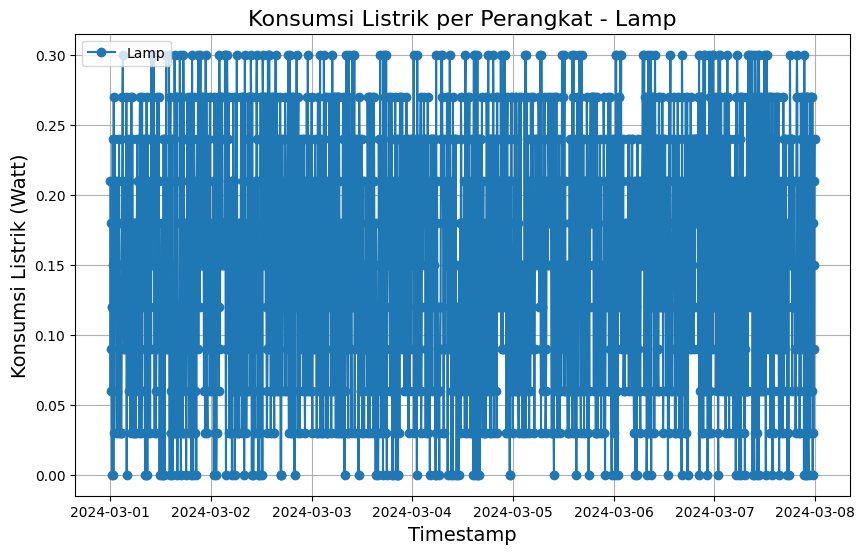

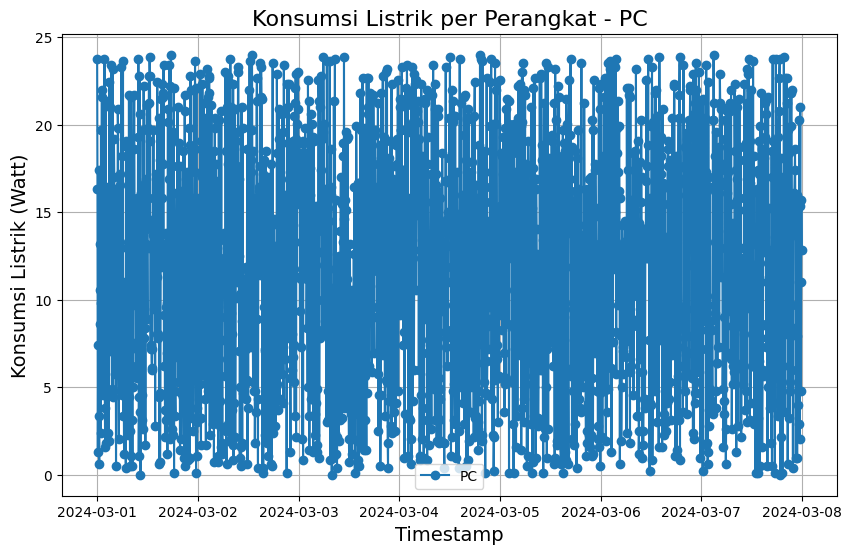

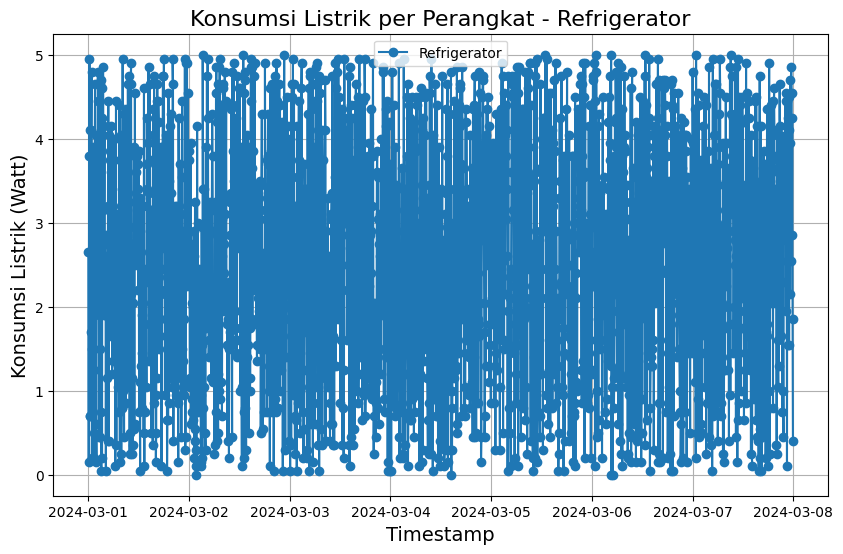

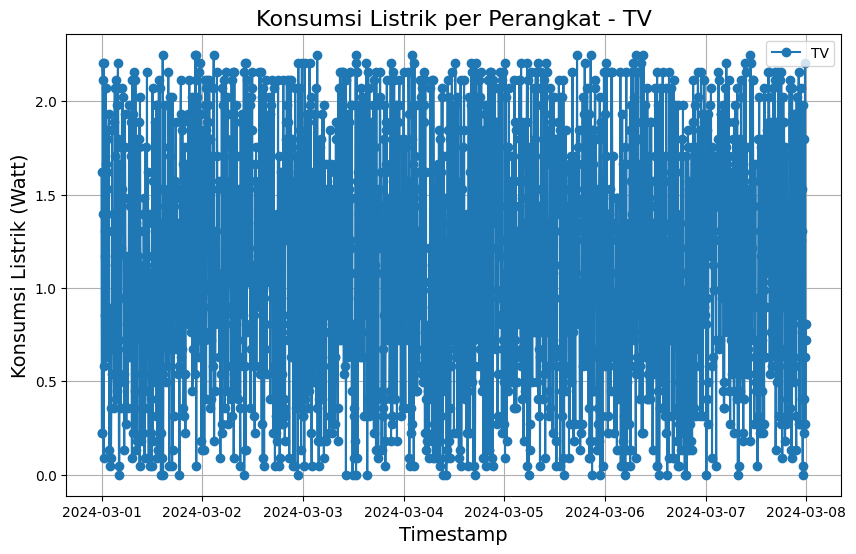

In [22]:
import matplotlib.pyplot as plt

# Mengelompokkan data berdasarkan "Device ID"
grouped_data = data.groupby('Device ID')

# Membuat plot untuk setiap perangkat
for device, device_data in grouped_data:
    plt.figure(figsize=(10, 6))
    plt.plot(device_data.index, device_data['Watt (W)'], marker='o', linestyle='-', label=device)
    
    # Menambahkan judul dan label sumbu
    plt.title(f'Konsumsi Listrik per Perangkat - {device}', fontsize=16)
    plt.xlabel('Timestamp', fontsize=14)
    plt.ylabel('Konsumsi Listrik (Watt)', fontsize=14)
    
    # Menambahkan legenda
    plt.legend()
    
    # Menampilkan grid
    plt.grid(True)
    
    # Menampilkan grafik
    plt.show()


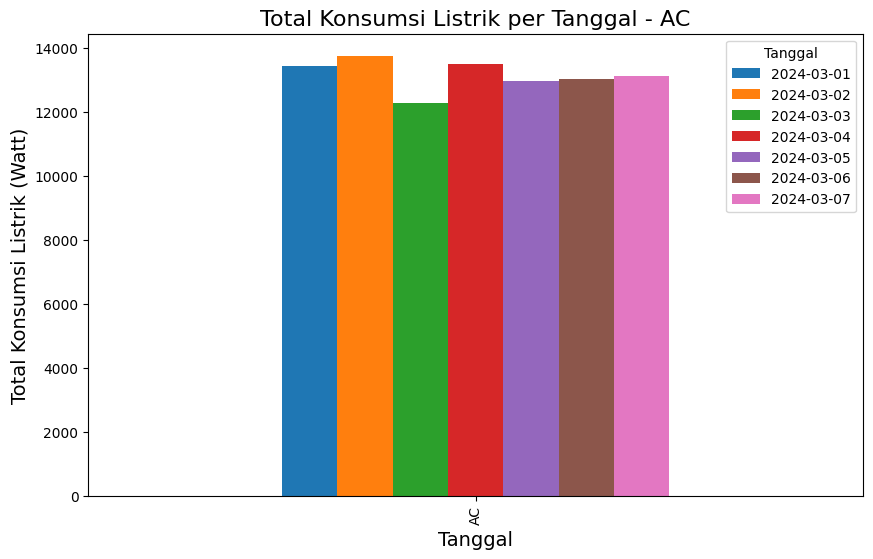

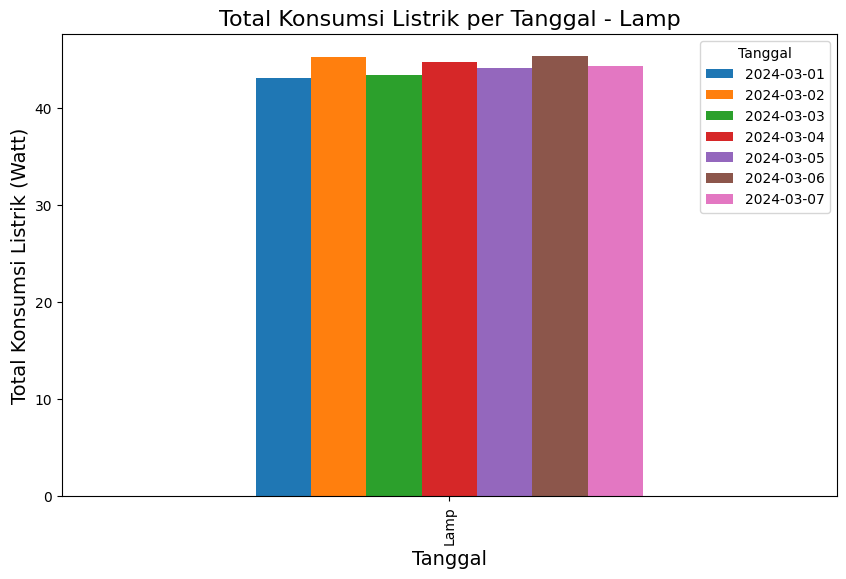

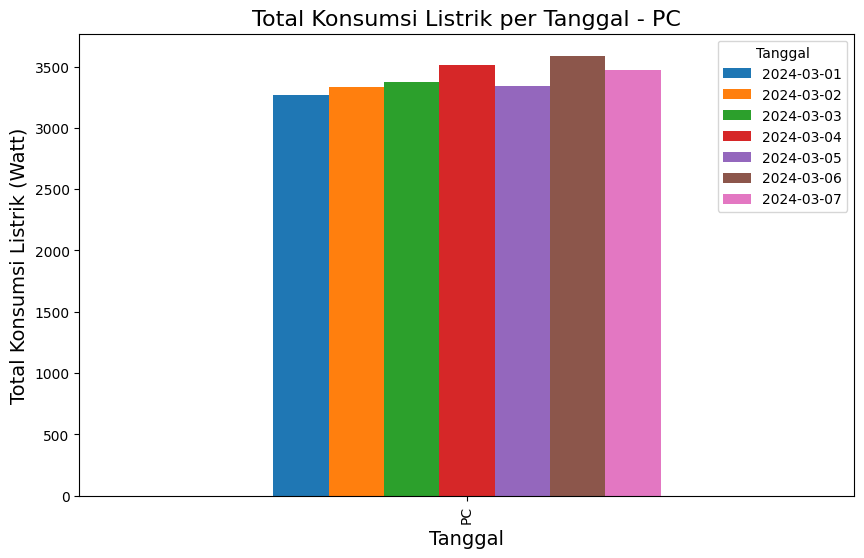

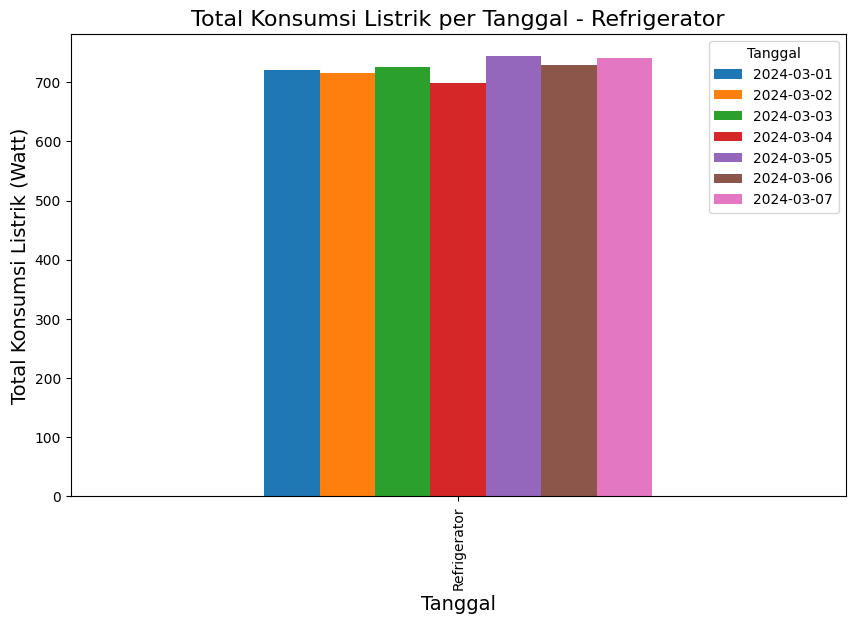

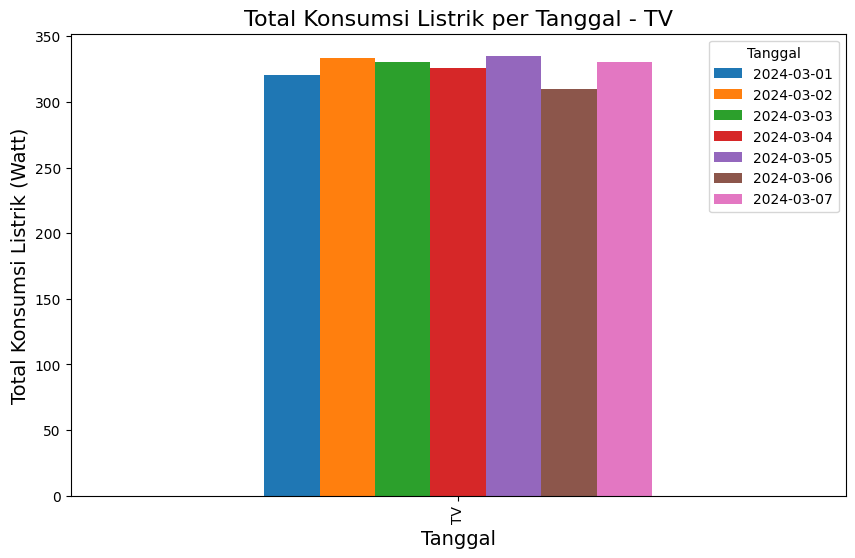

In [23]:
import matplotlib.pyplot as plt

# Mengelompokkan data berdasarkan "Device ID" dan tanggal, kemudian menjumlahkan Watt (W)
total_watt_per_device_date = data.groupby(['Device ID', data.index.date])['Watt (W)'].sum()

# Membuat plot untuk setiap peralatan
for device, device_data in total_watt_per_device_date.groupby(level=0):
    device_data.unstack().plot(kind='bar', figsize=(10, 6))
    
    # Menambahkan judul dan label sumbu
    plt.title(f'Total Konsumsi Listrik per Tanggal - {device}', fontsize=16)
    plt.xlabel('Tanggal', fontsize=14)
    plt.ylabel('Total Konsumsi Listrik (Watt)', fontsize=14)
    
    # Menambahkan legenda
    plt.legend(title='Tanggal')
    
    # Menampilkan grafik
    plt.show()


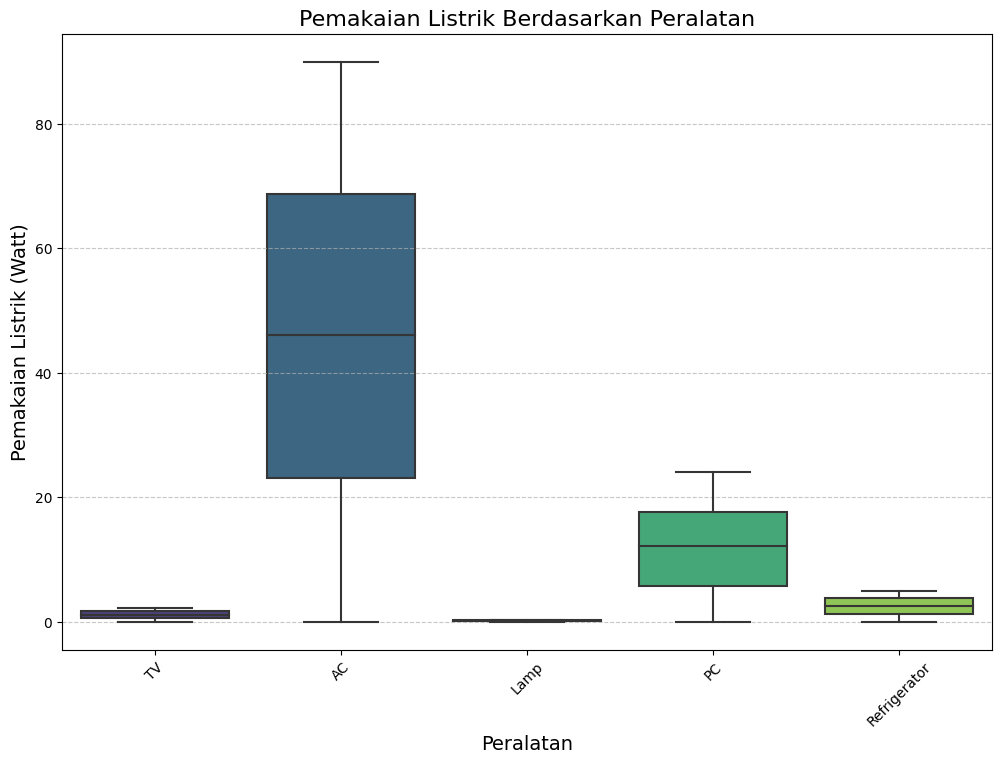

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat boxplot masing-masing peralatan berdasarkan tanggal
plt.figure(figsize=(12, 8))
sns.boxplot(x='Device ID', y='Watt (W)', data=data, palette='viridis')
plt.title('Pemakaian Listrik Berdasarkan Peralatan', fontsize=16)
plt.xlabel('Peralatan', fontsize=14)
plt.ylabel('Pemakaian Listrik (Watt)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [29]:
print(data)

                     Voltage (V)  Ampere (A)     Device ID  Watt (W)
Timestamp                                                           
2024-03-01 00:00:00          4.5        0.36            TV     1.620
2024-03-01 00:05:00          4.5        0.05            TV     0.225
2024-03-01 00:10:00          4.5        0.05            TV     0.225
2024-03-01 00:15:00          4.5        0.49            TV     2.205
2024-03-01 00:20:00          4.5        0.47            TV     2.115
...                          ...         ...           ...       ...
2024-03-07 23:35:00          5.0        0.91  Refrigerator     4.550
2024-03-07 23:40:00          5.0        0.57  Refrigerator     2.850
2024-03-07 23:45:00          5.0        0.85  Refrigerator     4.250
2024-03-07 23:50:00          5.0        0.37  Refrigerator     1.850
2024-03-07 23:55:00          5.0        0.08  Refrigerator     0.400

[10080 rows x 4 columns]


In [30]:
#check for missing values
pd.pivot_table(index='Timestamp',columns='Device ID',values='Watt (W)',data=data)

Device ID,AC,Lamp,PC,Refrigerator,TV
Timestamp,,,,,
2024-03-01 00:00:00,51.48,0.21,23.76,2.65,1.620
2024-03-01 00:05:00,55.80,0.06,16.32,0.15,0.225
2024-03-01 00:10:00,23.94,0.18,1.32,3.80,0.225
2024-03-01 00:15:00,88.56,0.09,7.44,4.95,2.205
2024-03-01 00:20:00,32.58,0.12,17.40,4.10,2.115
...,...,...,...,...,...
2024-03-07 23:35:00,64.62,0.03,21.00,4.55,0.630
2024-03-07 23:40:00,19.44,0.15,11.04,2.85,2.205
2024-03-07 23:45:00,35.46,0.09,4.80,4.25,0.270


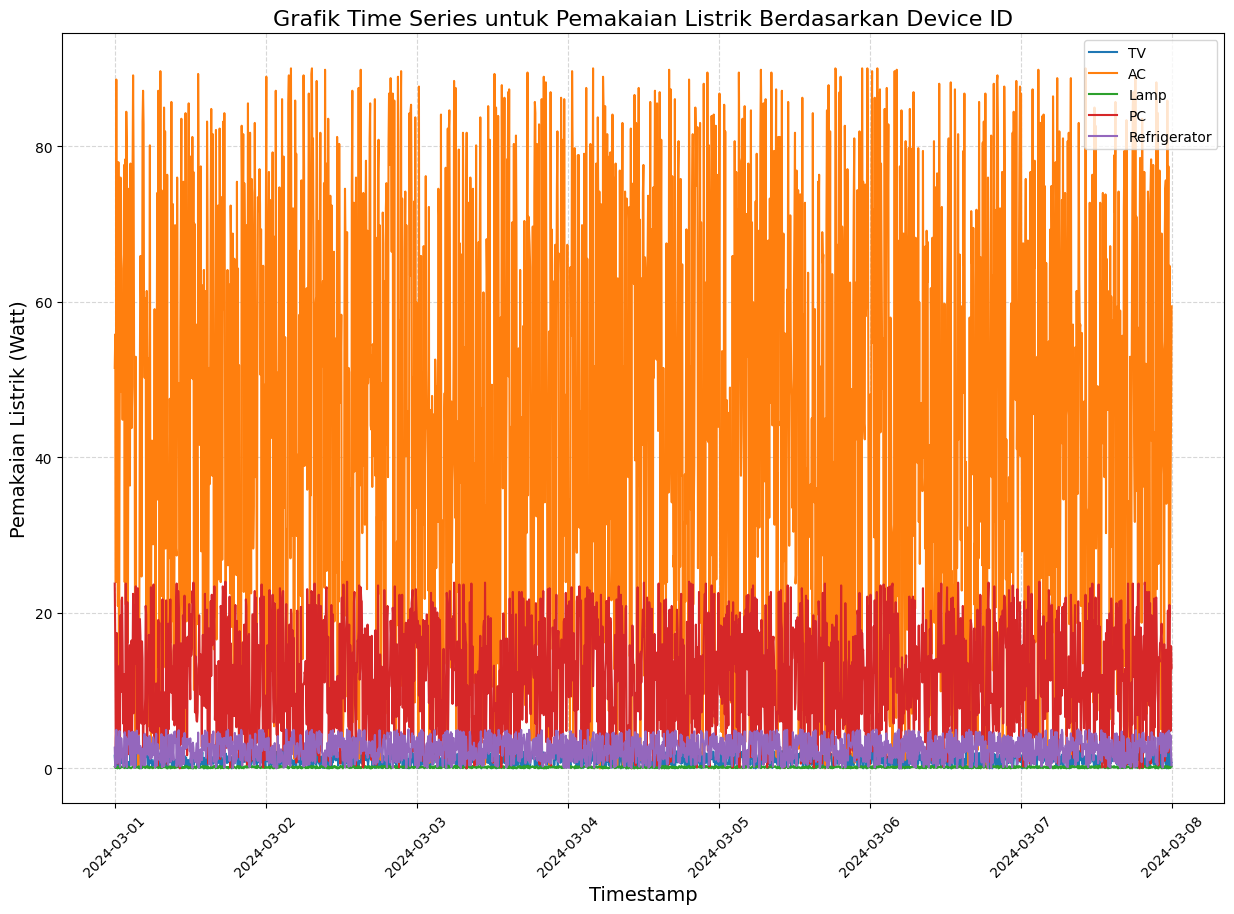

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ubah Device ID menjadi kolom untuk memungkinkan penggunaannya dalam plotting
data.reset_index(inplace=True)

plt.figure(figsize=(15,10))

# Loop melalui setiap Device ID untuk membuat plot time series
for device_id in data['Device ID'].unique():
    sns.lineplot(data=data[data['Device ID'] == device_id], x='Timestamp', y='Watt (W)', label=device_id)

plt.title('Grafik Time Series untuk Pemakaian Listrik Berdasarkan Device ID', fontsize=16)
plt.xlabel('Timestamp', fontsize=14)
plt.ylabel('Pemakaian Listrik (Watt)', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



In [37]:
# Ubah kolom Timestamp menjadi tipe datetime jika belum
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Buat kolom baru untuk tanggal saja
data['Date'] = data['Timestamp'].dt.date

# Hitung total watt per hari untuk setiap perangkat
total_watt_per_day_per_device = data.pivot_table(index='Date', columns='Device ID', values='Watt (W)', aggfunc='sum')

# Tampilkan hasilnya
print(total_watt_per_day_per_device)


Device ID         AC   Lamp       PC  Refrigerator       TV
Date                                                       
2024-03-01  13441.14  43.05  3269.76        720.40  320.310
2024-03-02  13761.00  45.30  3335.88        715.65  333.675
2024-03-03  12276.00  43.35  3372.12        726.00  330.750
2024-03-04  13490.10  44.73  3510.24        698.25  325.665
2024-03-05  12968.82  44.10  3340.92        744.50  335.160
2024-03-06  13018.32  45.36  3589.92        729.70  309.915
2024-03-07  13131.00  44.31  3469.20        740.70  330.210


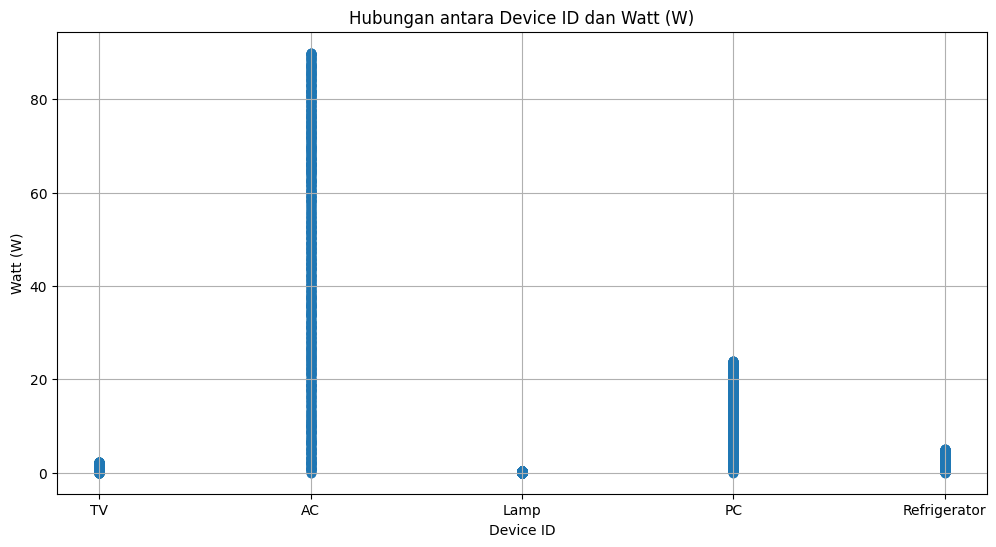

In [39]:
import matplotlib.pyplot as plt

# Plot scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(data['Device ID'], data['Watt (W)'], alpha=0.5)
plt.title('Hubungan antara Device ID dan Watt (W)')
plt.xlabel('Device ID')
plt.ylabel('Watt (W)')
plt.grid(True)
plt.show()


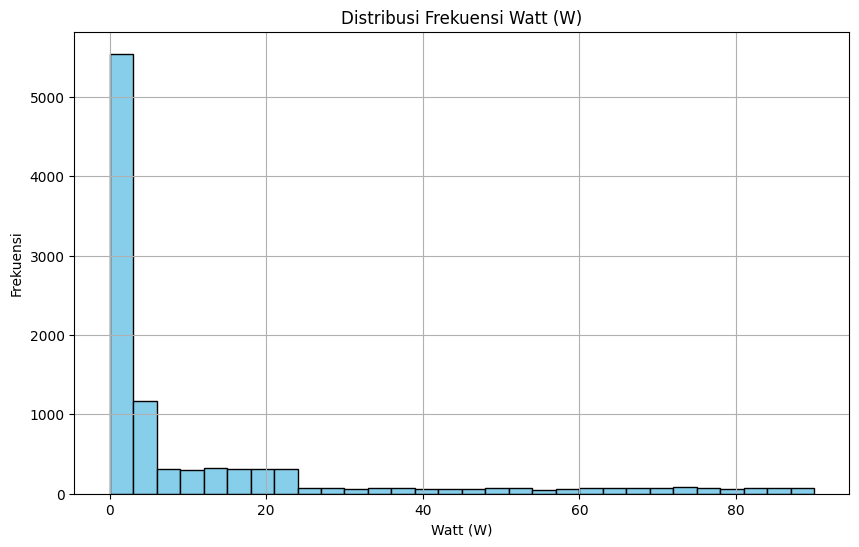

In [40]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Watt (W)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Frekuensi Watt (W)')
plt.xlabel('Watt (W)')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()


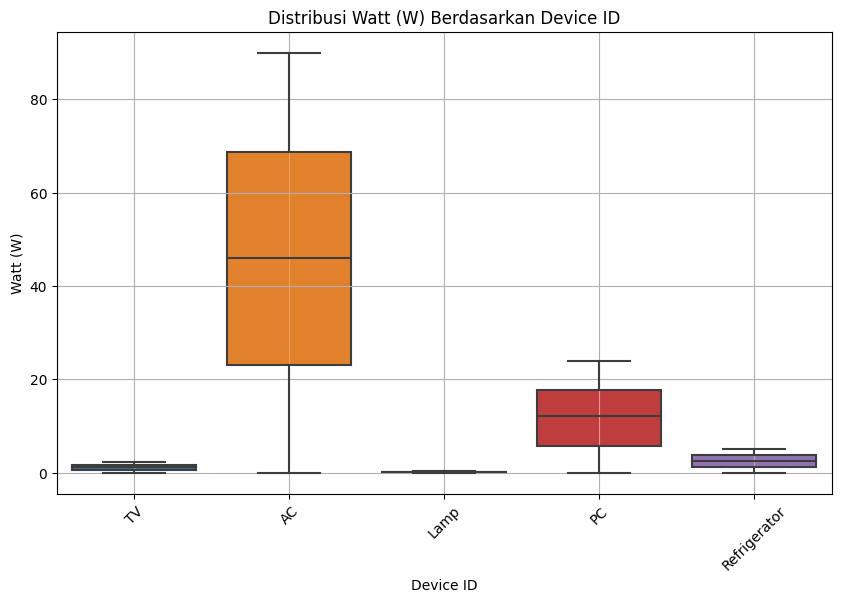

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Device ID', y='Watt (W)', data=data)
plt.title('Distribusi Watt (W) Berdasarkan Device ID')
plt.xlabel('from statsmodels.tsa.seasonal import seasonal_decompose

# Kelompokkan data berdasarkan "Device ID"
grouped_data = data.groupby('Device ID')

# Plot the decomposed time series for each device
for device, group in grouped_data:
    # Decompose the time series for each device
    result = seasonal_decompose(group['Watt (W)'], model='additive', period=1)
    
    # Plot the decomposed time series
    plt.figure(figsize=(12, 8))

    plt.subplot(411)
    plt.plot(result.observed)
    plt.title(f'Observed - {device}')

    plt.subplot(412)
    plt.plot(result.trend)
    plt.title(f'Trend - {device}')

    plt.subplot(413)
    plt.plot(result.seasonal)
    plt.title(f'Seasonal - {device}')

    plt.subplot(414)
    plt.plot(result.resid)
    plt.title(f'Residuals - {device}')

    plt.tight_layout()
    plt.show()
')
plt.ylabel('Watt (W)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


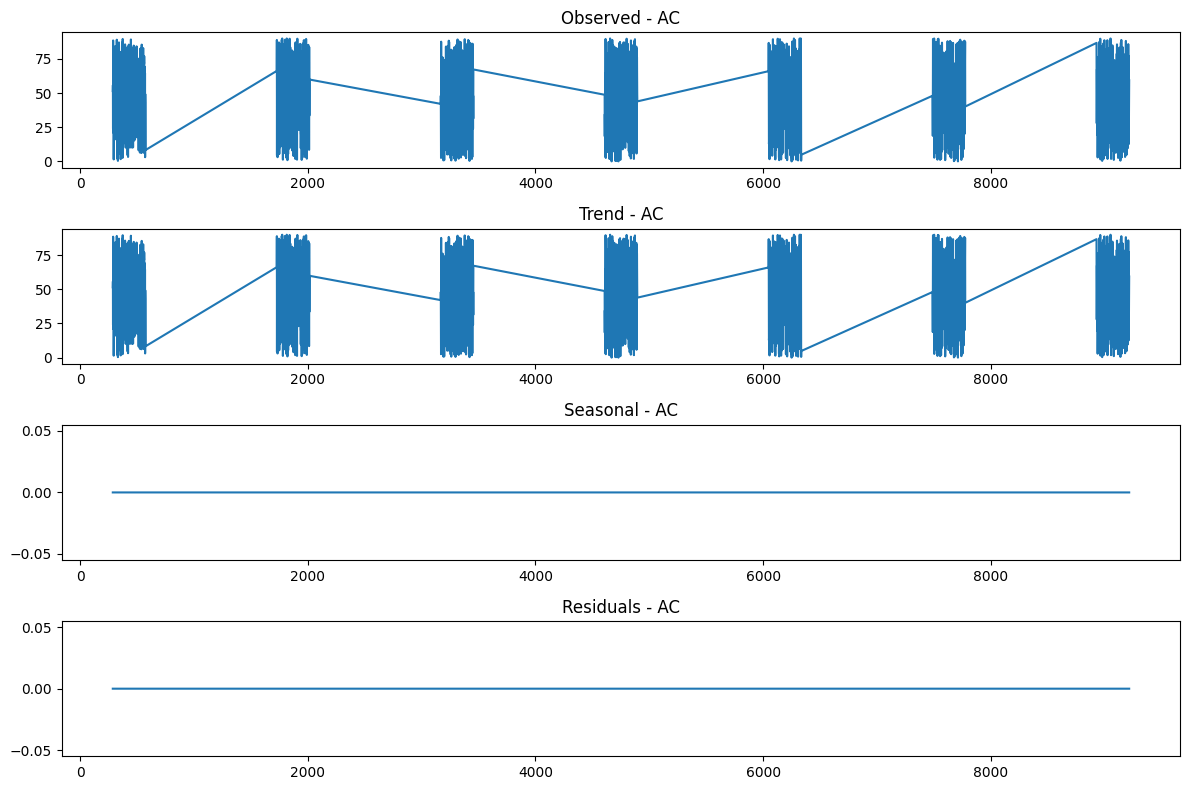

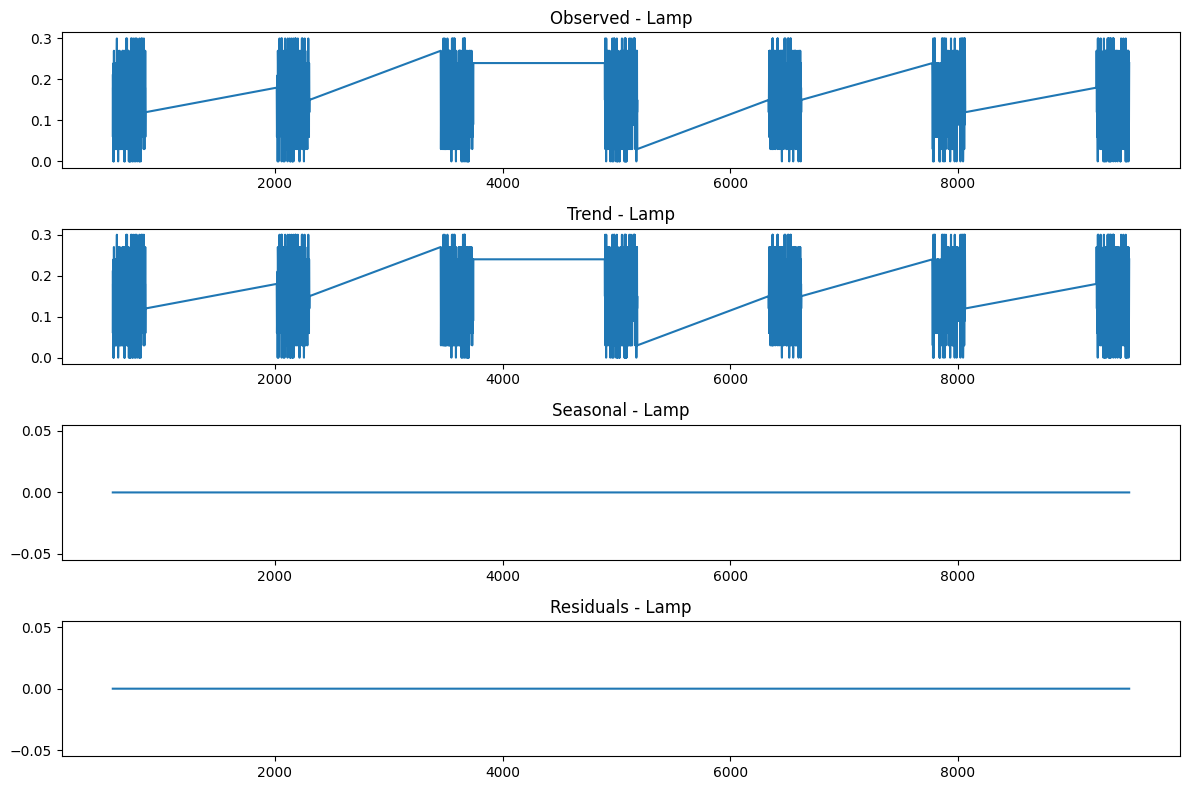

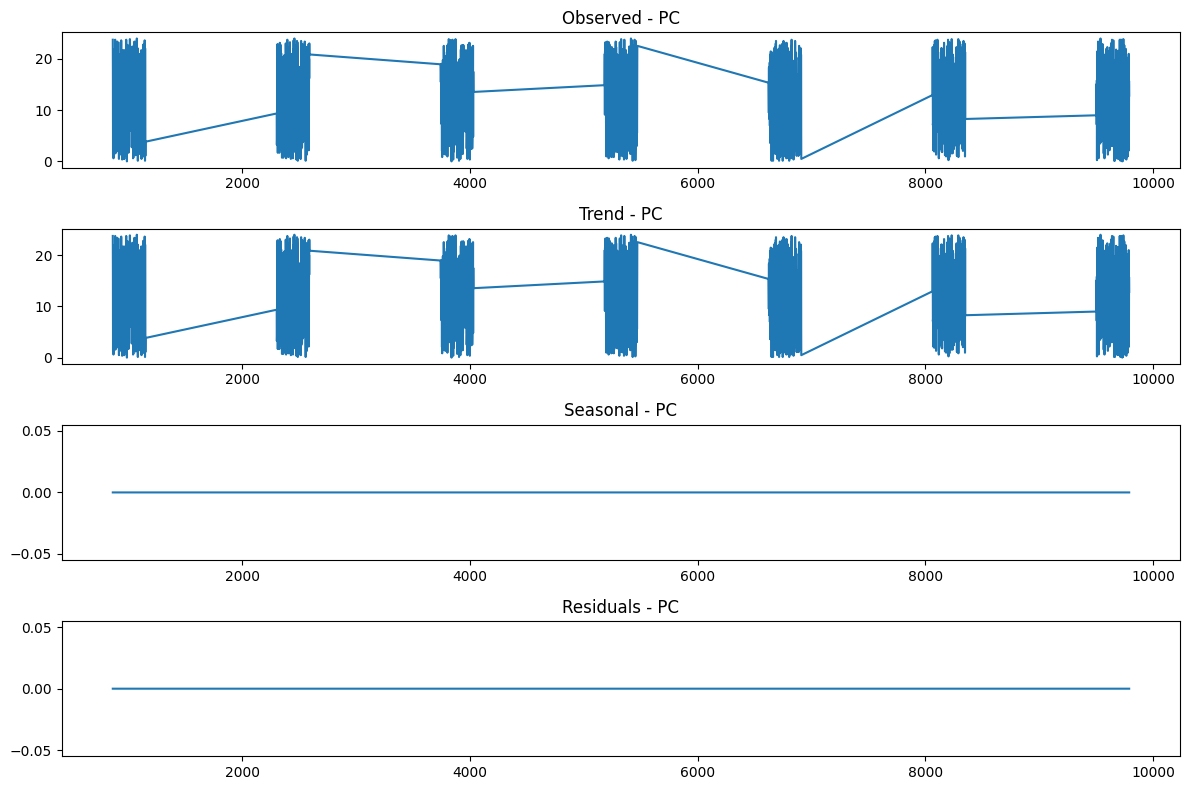

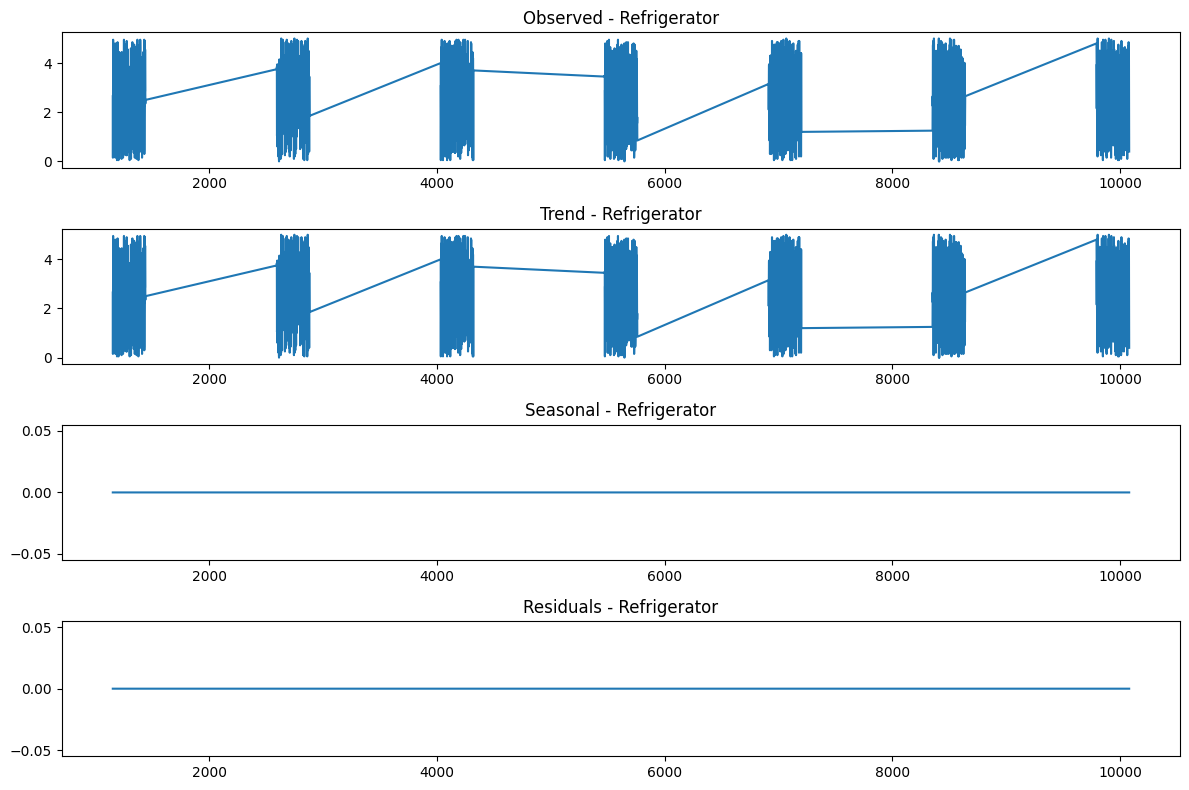

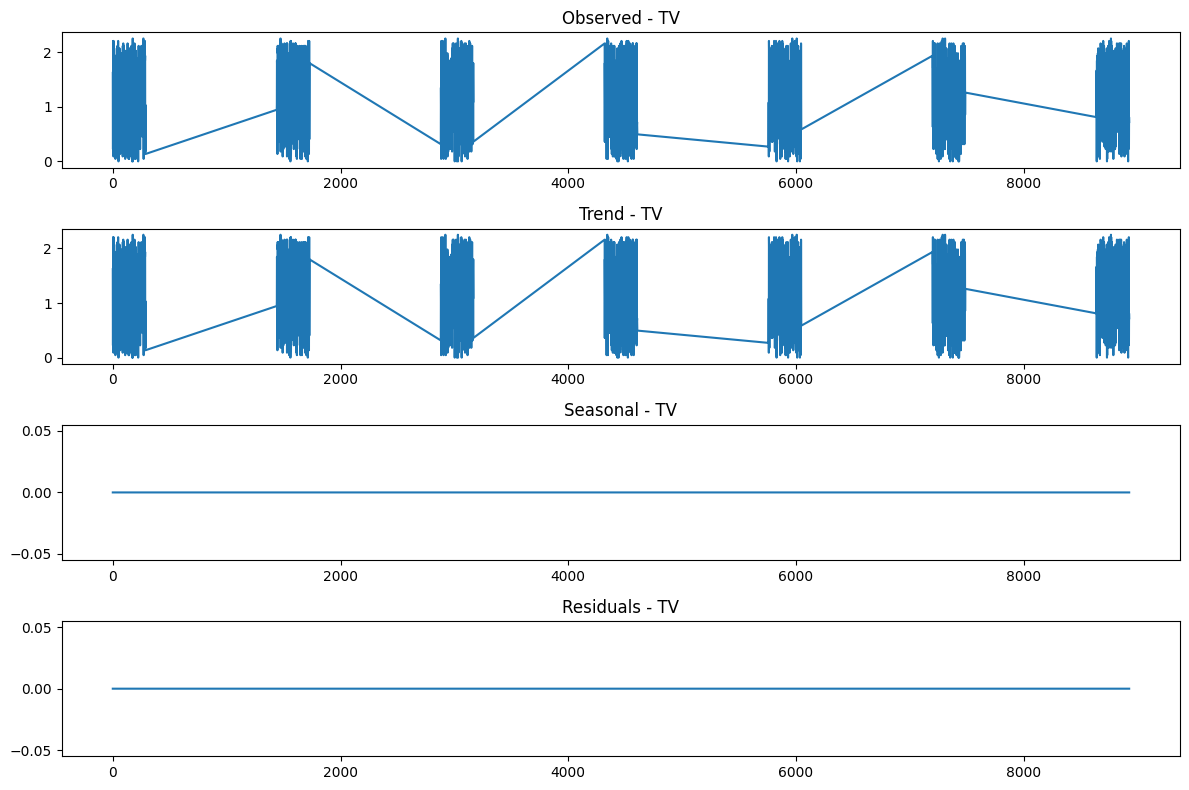

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Kelompokkan data berdasarkan "Device ID"
grouped_data = data.groupby('Device ID')

# Plot the decomposed time series for each device
for device, group in grouped_data:
    # Decompose the time series for each device
    result = seasonal_decompose(group['Watt (W)'], model='additive', period=1)
    
    # Plot the decomposed time series
    plt.figure(figsize=(12, 8))

    plt.subplot(411)
    plt.plot(result.observed)
    plt.title(f'Observed - {device}')

    plt.subplot(412)
    plt.plot(result.trend)
    plt.title(f'Trend - {device}')

    plt.subplot(413)
    plt.plot(result.seasonal)
    plt.title(f'Seasonal - {device}')

    plt.subplot(414)
    plt.plot(result.resid)
    plt.title(f'Residuals - {device}')

    plt.tight_layout()
    plt.show()


In [82]:
# Buat dictionary untuk menyimpan dataset terpisah untuk setiap Device ID
device_datasets = {}

# Kelompokkan data berdasarkan "Device ID"
grouped_data = data.groupby('Device ID')

# Iterasi melalui setiap grup dan simpan sebagai elemen dalam dictionary
for device_id, group in grouped_data:
    device_datasets[device_id] = group

# Contoh mengakses dataset untuk Device ID tertentu (misalnya, 'TV')
ac_data = device_datasets['AC']
lamp_data = device_datasets['Lamp']
pc_data = device_datasets['PC']
refrigerator_data = device_datasets['Refrigerator']
tv_data = device_datasets['TV']

print("Dataset untuk Device ID 'TV':")
print(refrigerator_data.head())



Dataset untuk Device ID 'TV':
               Timestamp  Voltage (V)  Ampere (A)     Device ID  Watt (W)  \
1152 2024-03-01 00:00:00          5.0        0.53  Refrigerator      2.65   
1153 2024-03-01 00:05:00          5.0        0.03  Refrigerator      0.15   
1154 2024-03-01 00:10:00          5.0        0.76  Refrigerator      3.80   
1155 2024-03-01 00:15:00          5.0        0.99  Refrigerator      4.95   
1156 2024-03-01 00:20:00          5.0        0.82  Refrigerator      4.10   

            Date  
1152  2024-03-01  
1153  2024-03-01  
1154  2024-03-01  
1155  2024-03-01  
1156  2024-03-01  


In [83]:
ac_data.isnull().sum()

Timestamp      0
Voltage (V)    0
Ampere (A)     0
Device ID      0
Watt (W)       0
Date           0
dtype: int64

In [50]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [55]:
ac_data.head()

,Timestamp,Voltage (V),Ampere (A),Device ID,Watt (W),Date
288,2024-03-01 00:00:00,18.0,2.86,AC,51.48,2024-03-01
289,2024-03-01 00:05:00,18.0,3.10,AC,55.80,2024-03-01
290,2024-03-01 00:10:00,18.0,1.33,AC,23.94,2024-03-01
291,2024-03-01 00:15:00,18.0,4.92,AC,88.56,2024-03-01
292,2024-03-01 00:20:00,18.0,1.81,AC,32.58,2024-03-01


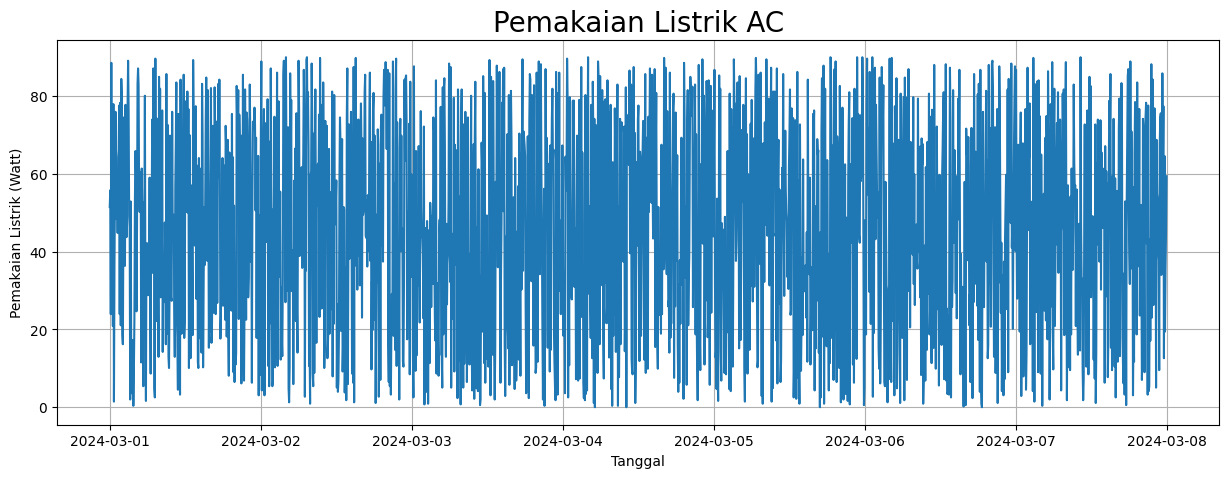

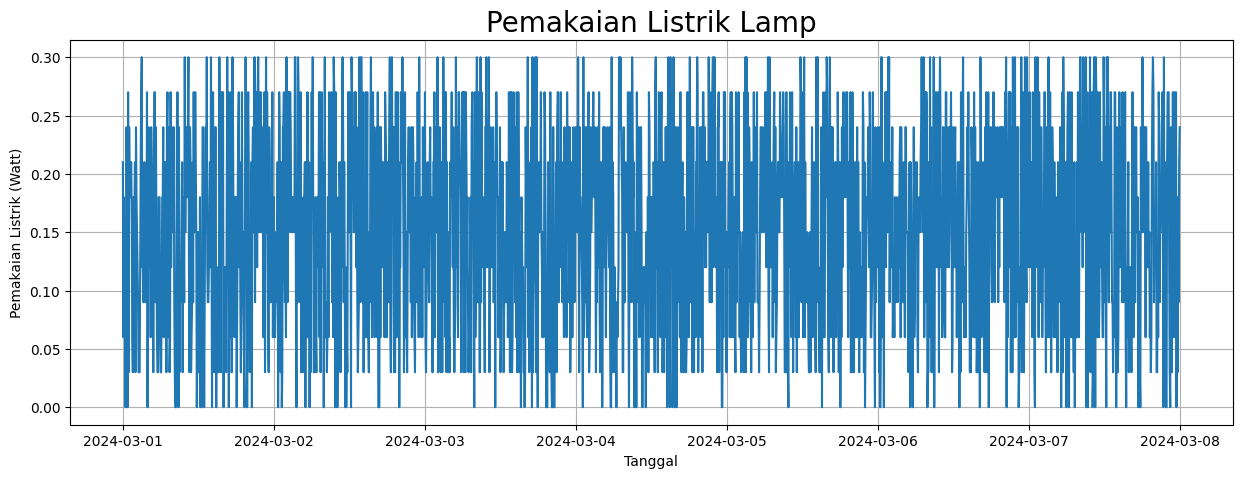

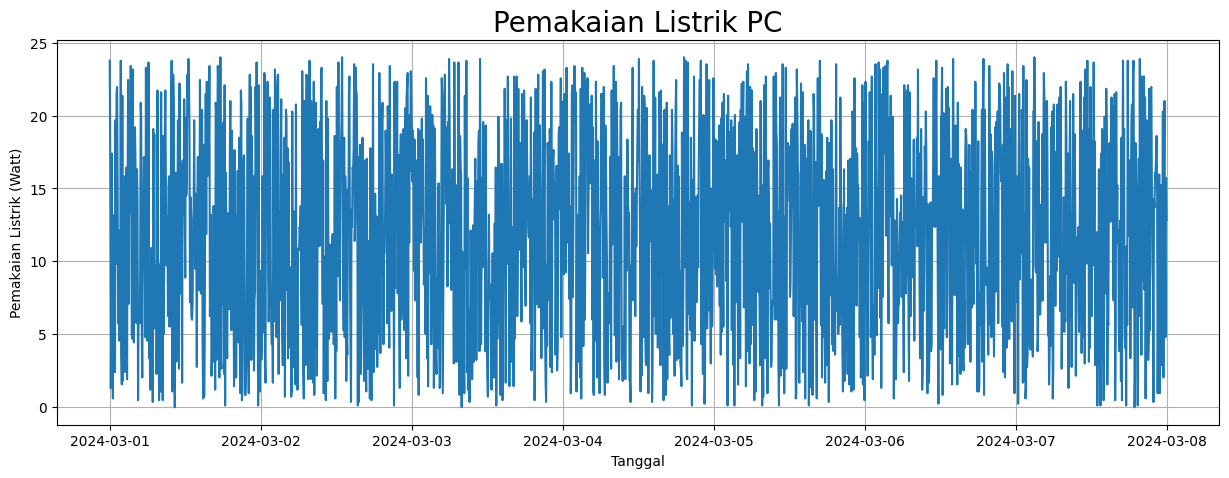

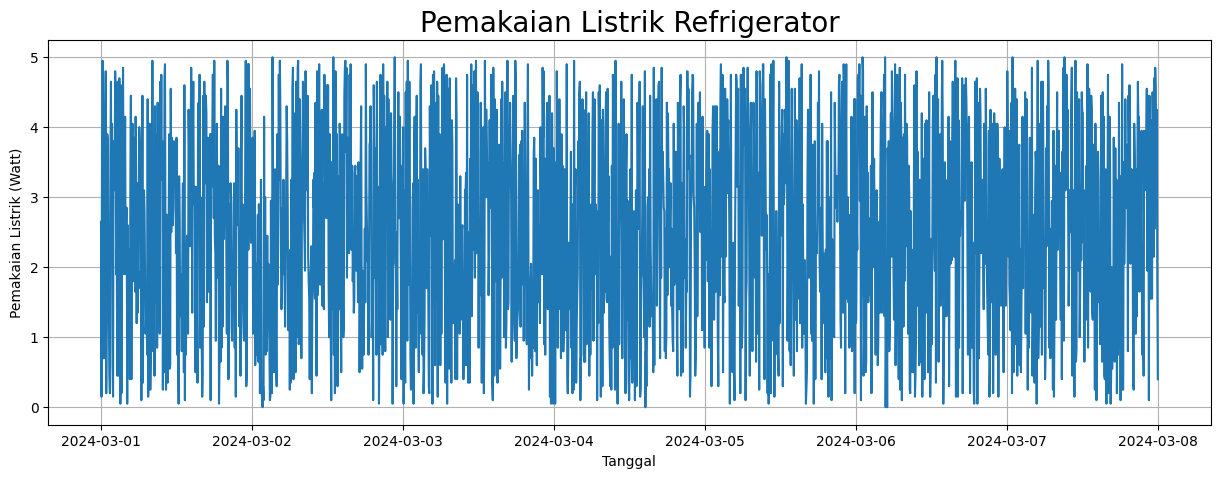

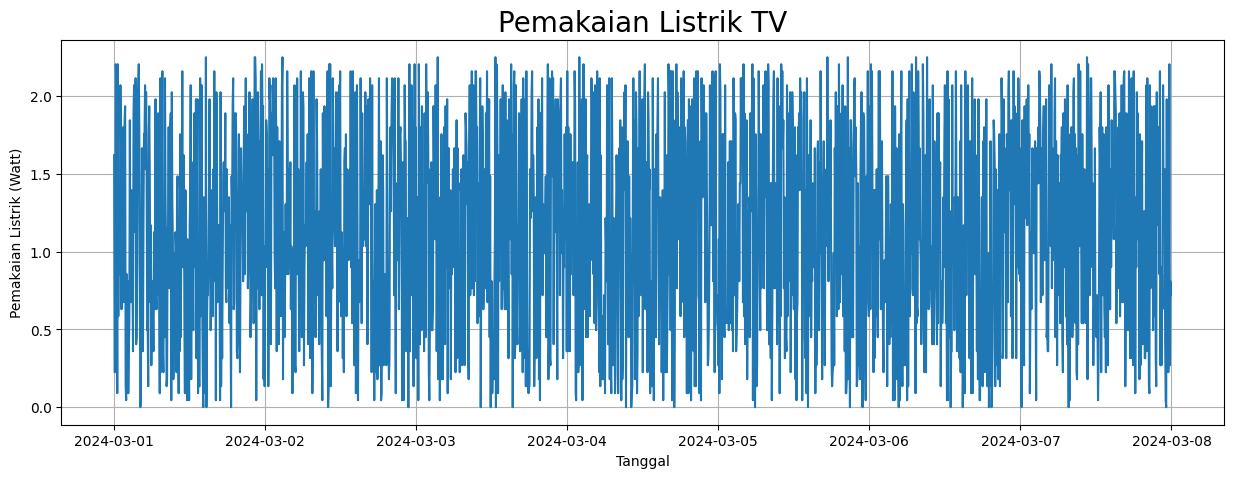

In [84]:
datespc = pc_data['Timestamp'].values
temppc = pc_data['Watt (W)'].values
datesrefrigerator = refrigerator_data['Timestamp'].values
temprefrigerator = refrigerator_data['Watt (W)'].values
datestv = tv_data['Timestamp'].values
temptv = tv_data['Watt (W)'].values

import matplotlib.pyplot as plt

# Plot untuk perangkat AC
plt.figure(figsize=(15, 5))
plt.plot(datesac, tempac)
plt.title('Pemakaian Listrik AC', fontsize=20)
plt.xlabel('Tanggal')
plt.ylabel('Pemakaian Listrik (Watt)')
plt.grid(True)
plt.show()

# Plot untuk perangkat Lamp
plt.figure(figsize=(15, 5))
plt.plot(dateslamp, templamp)
plt.title('Pemakaian Listrik Lamp', fontsize=20)
plt.xlabel('Tanggal')
plt.ylabel('Pemakaian Listrik (Watt)')
plt.grid(True)
plt.show()

# Plot untuk perangkat PC
plt.figure(figsize=(15, 5))
plt.plot(datespc, temppc)
plt.title('Pemakaian Listrik PC', fontsize=20)
plt.xlabel('Tanggal')
plt.ylabel('Pemakaian Listrik (Watt)')
plt.grid(True)
plt.show()

# Plot untuk perangkat Refrigerator
plt.figure(figsize=(15, 5))
plt.plot(datesrefrigerator, temprefrigerator)
plt.title('Pemakaian Listrik Refrigerator', fontsize=20)
plt.xlabel('Tanggal')
plt.ylabel('Pemakaian Listrik (Watt)')
plt.grid(True)
plt.show()

# Plot untuk perangkat TV
plt.figure(figsize=(15, 5))
plt.plot(datestv, temptv)
plt.title('Pemakaian Listrik TV', fontsize=20)
plt.xlabel('Tanggal')
plt.ylabel('Pemakaian Listrik (Watt)')
plt.grid(True)
plt.show()


In [105]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [150]:
jumlah_data_device_id = pc_data['Device ID'].shape[0]
print("Jumlah data pada kolom 'Device ID':", jumlah_data_device_id)


Jumlah data pada kolom 'Device ID': 2016


In [109]:
data_train = pc_data
data_train.head()

,Timestamp,Voltage (V),Ampere (A),Device ID,Watt (W),Date
864,2024-03-01 00:00:00,12.0,1.98,PC,23.76,2024-03-01
865,2024-03-01 00:05:00,12.0,1.36,PC,16.32,2024-03-01
866,2024-03-01 00:10:00,12.0,0.11,PC,1.32,2024-03-01
867,2024-03-01 00:15:00,12.0,0.62,PC,7.44,2024-03-01
868,2024-03-01 00:20:00,12.0,1.45,PC,17.40,2024-03-01


In [110]:
data_train.isnull().sum()

Timestamp      0
Voltage (V)    0
Ampere (A)     0
Device ID      0
Watt (W)       0
Date           0
dtype: int64

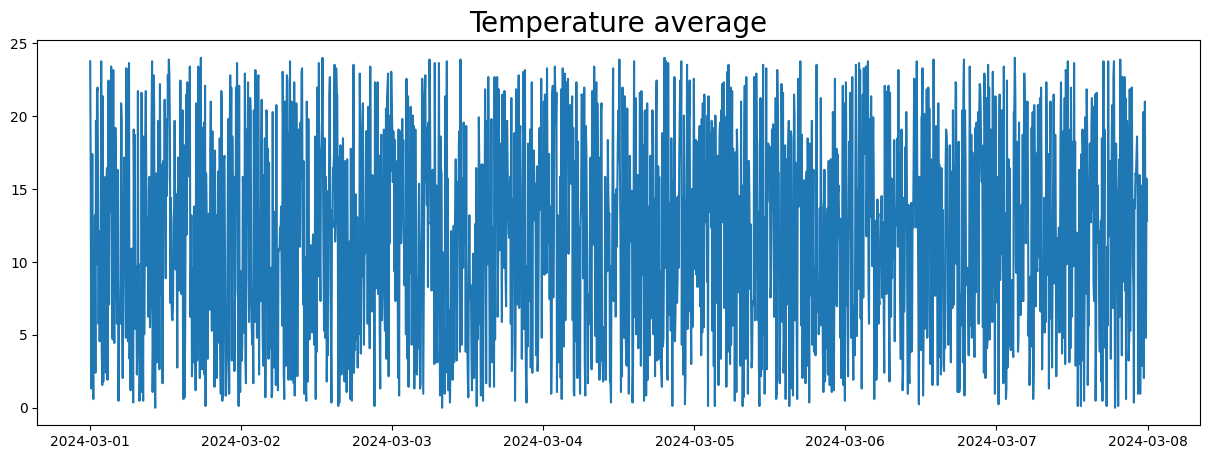

In [146]:
dates = data_train['Timestamp'].values
temp  = data_train['Watt (W)'].values
     
     
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Temperature average',
              fontsize=20);

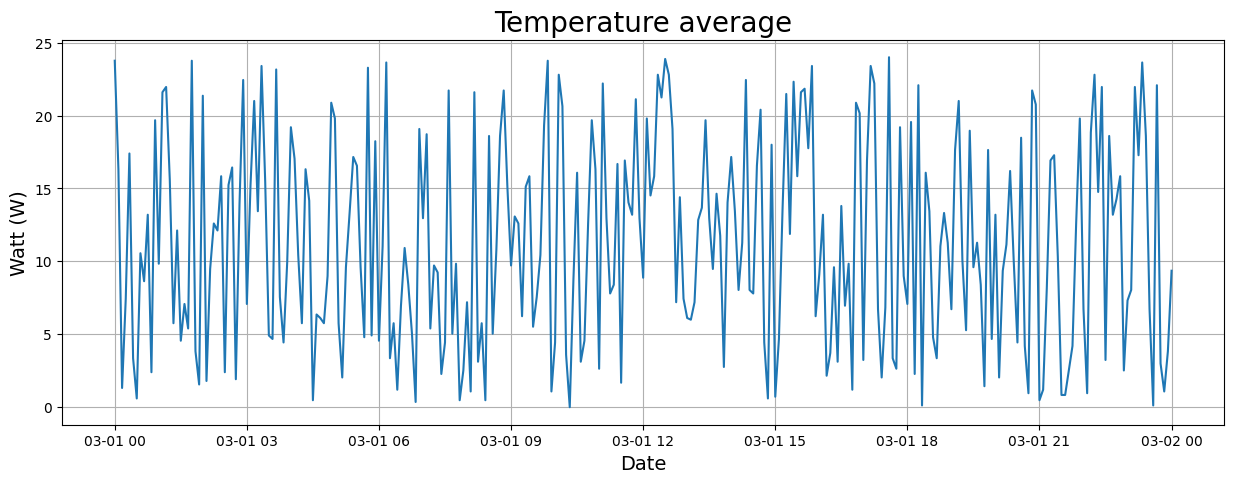

In [147]:
import matplotlib.pyplot as plt

# Ambil data yang sesuai dengan rentang tanggal yang diinginkan
start_date = '2024-03-01'
end_date = '2024-03-02'
mask = (data_train['Timestamp'] >= start_date) & (data_train['Timestamp'] <= end_date)
dates = data_train.loc[mask, 'Timestamp'].values
temp = data_train.loc[mask, 'Watt (W)'].values

# Plot grafik
plt.figure(figsize=(15, 5))
plt.plot(dates, temp)
plt.title('Temperature average', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Watt (W)', fontsize=14)
plt.grid(True)
plt.show()


In [148]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [144]:
train_set = windowed_dataset(temp, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(100, return_sequences=True),  # Contoh: jumlah unit LSTM lebih banyak
    tf.keras.layers.LSTM(100),
    tf.keras.layers.Dense(50, activation="relu"),  # Contoh: jumlah unit Dense lebih banyak
    tf.keras.layers.Dense(1),
])


In [145]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])
history = model.fit(train_set,epochs=100)

Epoch 1/100
3/3 [==============================] - 12s 207ms/step - loss: 10.6396 - mae: 11.1247
Epoch 2/100
3/3 [==============================] - 1s 135ms/step - loss: 9.4659 - mae: 9.9502
Epoch 3/100
3/3 [==============================] - 0s 100ms/step - loss: 7.6889 - mae: 8.1745
Epoch 4/100
3/3 [==============================] - 0s 127ms/step - loss: 6.0276 - mae: 6.5119
Epoch 5/100
3/3 [==============================] - 0s 122ms/step - loss: 6.0270 - mae: 6.5129
Epoch 6/100
3/3 [==============================] - 0s 129ms/step - loss: 6.5684 - mae: 7.0570
Epoch 7/100
3/3 [==============================] - 1s 120ms/step - loss: 5.9212 - mae: 6.4110
Epoch 8/100
3/3 [==============================] - 0s 124ms/step - loss: 5.7742 - mae: 6.2530
Epoch 9/100
3/3 [==============================] - 0s 120ms/step - loss: 5.8335 - mae: 6.3195
Epoch 10/100
3/3 [==============================] - 0s 128ms/step - loss: 5.7551 - mae: 6.2387
Epoch 11/100
3/3 [==============================] - 0s 1